[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/11_Batch_Normalization_FashionMnist.ipynb)

# 11 Comparison of Batch Normalization Using FashionMNIST


## 1. Introduction to the Dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes

Labels:


*   0 : T-shirt/top
*   1 : Trouser
*   2 : Pullover
*   3 : Dress
*   4 : Coat
*   5 : Sandal
*   6 : Shirt
*   7 : Sneake
*   8 : Bag
*   9 : Ankle Boot











## 2. Data Preprocessing

In [1]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist
(X_train,Y_train),(X_test,Y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [0]:
num_classes = 10
img_rows, img_cols = 28, 28
epochs = 100
batch_size = 256
input_shape = (img_rows, img_cols, 1)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
Y_train = to_categorical(Y_train,num_classes)
Y_test = to_categorical(Y_test, num_classes)

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train.shape, X_test.shape,Y_train.shape, Y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

## 3. Building the Neural Network

In [0]:
import time
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.layers.normalization import BatchNormalization

### 3.1 without Batch Normalization

In [0]:
model_1 = Sequential()

model_1.add(Conv2D(32, kernel_size=(3,3),input_shape=input_shape,use_bias=True))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(2,2))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(64, (3,3),use_bias=True))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(128,(3,3),use_bias=True))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.4))

model_1.add(Flatten())
model_1.add(Dense(128,use_bias=True))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.3))
model_1.add(Dense(num_classes,activation='softmax'))
  
model_1.compile(loss='categorical_crossentropy',
               optimizer=optimizers.Adam(lr=0.01),metrics=['accuracy'])
  

In [8]:
start = time.time()
model_1_history = model_1.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test, Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 7s - loss: 0.7148 - acc: 0.7317 - val_loss: 0.4560 - val_acc: 0.8239
Epoch 2/100
 - 5s - loss: 0.5039 - acc: 0.8110 - val_loss: 0.4005 - val_acc: 0.8472
Epoch 3/100
 - 5s - loss: 0.4724 - acc: 0.8217 - val_loss: 0.3893 - val_acc: 0.8512
Epoch 4/100
 - 5s - loss: 0.4648 - acc: 0.8275 - val_loss: 0.3992 - val_acc: 0.8513
Epoch 5/100
 - 5s - loss: 0.4574 - acc: 0.8290 - val_loss: 0.3901 - val_acc: 0.8525
Epoch 6/100
 - 5s - loss: 0.4519 - acc: 0.8330 - val_loss: 0.3790 - val_acc: 0.8546
Epoch 7/100
 - 5s - loss: 0.4500 - acc: 0.8351 - val_loss: 0.3919 - val_acc: 0.8525
Epoch 8/100
 - 5s - loss: 0.4483 - acc: 0.8326 - val_loss: 0.3759 - val_acc: 0.8553
Epoch 9/100
 - 5s - loss: 0.4458 - acc: 0.8352 - val_loss: 0.3695 - val_acc: 0.8611
Epoch 10/100
 - 5s - loss: 0.4453 - acc: 0.8360 - val_loss: 0.3521 - val_acc: 0.8720
Epoch 11/100
 - 5s - loss: 0.4460 - acc: 0.8353 - val_loss: 0.3744 - val_acc: 0.8603
Epoch 12/100
 - 5s - los

 - 5s - loss: 0.4329 - acc: 0.8387 - val_loss: 0.3685 - val_acc: 0.8606
Epoch 35/100
 - 5s - loss: 0.4355 - acc: 0.8395 - val_loss: 0.3411 - val_acc: 0.8720
Epoch 36/100
 - 5s - loss: 0.4360 - acc: 0.8415 - val_loss: 0.3746 - val_acc: 0.8557
Epoch 37/100
 - 5s - loss: 0.4474 - acc: 0.8366 - val_loss: 0.3614 - val_acc: 0.8655
Epoch 38/100
 - 5s - loss: 0.4393 - acc: 0.8394 - val_loss: 0.3672 - val_acc: 0.8603
Epoch 39/100
 - 5s - loss: 0.4471 - acc: 0.8370 - val_loss: 0.3620 - val_acc: 0.8649
Epoch 40/100
 - 5s - loss: 0.4406 - acc: 0.8361 - val_loss: 0.3664 - val_acc: 0.8638
Epoch 41/100
 - 5s - loss: 0.4374 - acc: 0.8387 - val_loss: 0.3515 - val_acc: 0.8702
Epoch 42/100
 - 5s - loss: 0.4282 - acc: 0.8423 - val_loss: 0.3512 - val_acc: 0.8711
Epoch 43/100
 - 5s - loss: 0.4371 - acc: 0.8407 - val_loss: 0.3612 - val_acc: 0.8654
Epoch 44/100
 - 5s - loss: 0.4337 - acc: 0.8392 - val_loss: 0.3568 - val_acc: 0.8672
Epoch 45/100
 - 5s - loss: 0.4284 - acc: 0.8421 - val_loss: 0.3649 - val_acc: 

Epoch 68/100
 - 5s - loss: 0.4378 - acc: 0.8411 - val_loss: 0.3653 - val_acc: 0.8651
Epoch 69/100
 - 5s - loss: 0.4381 - acc: 0.8397 - val_loss: 0.3568 - val_acc: 0.8657
Epoch 70/100
 - 5s - loss: 0.4457 - acc: 0.8395 - val_loss: 0.3844 - val_acc: 0.8570
Epoch 71/100
 - 5s - loss: 0.4361 - acc: 0.8405 - val_loss: 0.3561 - val_acc: 0.8706
Epoch 72/100
 - 5s - loss: 0.4368 - acc: 0.8409 - val_loss: 0.3824 - val_acc: 0.8555
Epoch 73/100
 - 5s - loss: 0.4408 - acc: 0.8384 - val_loss: 0.3619 - val_acc: 0.8637
Epoch 74/100
 - 5s - loss: 0.4441 - acc: 0.8389 - val_loss: 0.3556 - val_acc: 0.8670
Epoch 75/100
 - 5s - loss: 0.4424 - acc: 0.8379 - val_loss: 0.3573 - val_acc: 0.8625
Epoch 76/100
 - 5s - loss: 0.4319 - acc: 0.8420 - val_loss: 0.3681 - val_acc: 0.8622
Epoch 77/100
 - 5s - loss: 0.4386 - acc: 0.8387 - val_loss: 0.3737 - val_acc: 0.8605
Epoch 78/100
 - 5s - loss: 0.4427 - acc: 0.8381 - val_loss: 0.3576 - val_acc: 0.8632
Epoch 79/100
 - 5s - loss: 0.4382 - acc: 0.8391 - val_loss: 0.368

In [9]:
train_loss_1, train_accuracy_1 = model_1.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_1 * 100, train_loss_1))
test_loss_1, test_accuracy_1 = model_1.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_1 * 100, test_loss_1))

Training Accuracy = 87.88 %     loss = 0.313448
Testing Accuracy = 86.03 %    loss = 0.364143


### 3.2 with Batch Normalization

In [0]:
model_2 = Sequential()

model_2.add(Conv2D(32, kernel_size=(3,3),input_shape=input_shape,use_bias=True))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(2,2))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (3,3),use_bias=True))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(128,(3,3),use_bias=True))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dropout(0.4))

model_2.add(Flatten())
model_2.add(Dense(128,use_bias=True))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(num_classes,activation='softmax'))
  
model_2.compile(loss='categorical_crossentropy',
               optimizer=optimizers.Adam(lr=0.01),metrics=['accuracy'])

In [12]:
start = time.time()
model_2_history = model_2.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test, Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 8s - loss: 0.5276 - acc: 0.8067 - val_loss: 0.3911 - val_acc: 0.8559
Epoch 2/100
 - 7s - loss: 0.3812 - acc: 0.8614 - val_loss: 0.4430 - val_acc: 0.8279
Epoch 3/100
 - 7s - loss: 0.3428 - acc: 0.8748 - val_loss: 0.4309 - val_acc: 0.8274
Epoch 4/100
 - 7s - loss: 0.3199 - acc: 0.8826 - val_loss: 0.3653 - val_acc: 0.8646
Epoch 5/100
 - 7s - loss: 0.3030 - acc: 0.8881 - val_loss: 0.3216 - val_acc: 0.8777
Epoch 6/100
 - 7s - loss: 0.2942 - acc: 0.8912 - val_loss: 0.2935 - val_acc: 0.8922
Epoch 7/100
 - 7s - loss: 0.2850 - acc: 0.8943 - val_loss: 0.2593 - val_acc: 0.9066
Epoch 8/100
 - 7s - loss: 0.2750 - acc: 0.8984 - val_loss: 0.3732 - val_acc: 0.8544
Epoch 9/100
 - 7s - loss: 0.2749 - acc: 0.8978 - val_loss: 0.2645 - val_acc: 0.9011
Epoch 10/100
 - 7s - loss: 0.2678 - acc: 0.9017 - val_loss: 0.2601 - val_acc: 0.8997
Epoch 11/100
 - 7s - loss: 0.2584 - acc: 0.9045 - val_loss: 0.2656 - val_acc: 0.9011
Epoch 12/100
 - 7s - los

 - 7s - loss: 0.2080 - acc: 0.9220 - val_loss: 0.2190 - val_acc: 0.9211
Epoch 35/100
 - 7s - loss: 0.2089 - acc: 0.9214 - val_loss: 0.2357 - val_acc: 0.9131
Epoch 36/100
 - 7s - loss: 0.2042 - acc: 0.9239 - val_loss: 0.2459 - val_acc: 0.9081
Epoch 37/100
 - 7s - loss: 0.2034 - acc: 0.9226 - val_loss: 0.2537 - val_acc: 0.9068
Epoch 38/100
 - 7s - loss: 0.2034 - acc: 0.9235 - val_loss: 0.2125 - val_acc: 0.9250
Epoch 39/100
 - 7s - loss: 0.2020 - acc: 0.9243 - val_loss: 0.2454 - val_acc: 0.9085
Epoch 40/100
 - 7s - loss: 0.2011 - acc: 0.9236 - val_loss: 0.2511 - val_acc: 0.9070
Epoch 41/100
 - 7s - loss: 0.2001 - acc: 0.9249 - val_loss: 0.2192 - val_acc: 0.9194
Epoch 42/100
 - 7s - loss: 0.1968 - acc: 0.9253 - val_loss: 0.2396 - val_acc: 0.9137
Epoch 43/100
 - 7s - loss: 0.2010 - acc: 0.9240 - val_loss: 0.2171 - val_acc: 0.9193
Epoch 44/100
 - 7s - loss: 0.1976 - acc: 0.9252 - val_loss: 0.2807 - val_acc: 0.8984
Epoch 45/100
 - 7s - loss: 0.1946 - acc: 0.9269 - val_loss: 0.2232 - val_acc: 

Epoch 68/100
 - 7s - loss: 0.1760 - acc: 0.9328 - val_loss: 0.2080 - val_acc: 0.9262
Epoch 69/100
 - 7s - loss: 0.1783 - acc: 0.9325 - val_loss: 0.2349 - val_acc: 0.9148
Epoch 70/100
 - 7s - loss: 0.1739 - acc: 0.9336 - val_loss: 0.2320 - val_acc: 0.9181
Epoch 71/100
 - 7s - loss: 0.1741 - acc: 0.9337 - val_loss: 0.2220 - val_acc: 0.9220
Epoch 72/100
 - 7s - loss: 0.1764 - acc: 0.9325 - val_loss: 0.2147 - val_acc: 0.9253
Epoch 73/100
 - 7s - loss: 0.1746 - acc: 0.9334 - val_loss: 0.2294 - val_acc: 0.9177
Epoch 74/100
 - 7s - loss: 0.1783 - acc: 0.9328 - val_loss: 0.2210 - val_acc: 0.9230
Epoch 75/100
 - 7s - loss: 0.1730 - acc: 0.9349 - val_loss: 0.2239 - val_acc: 0.9193
Epoch 76/100
 - 7s - loss: 0.1757 - acc: 0.9340 - val_loss: 0.2089 - val_acc: 0.9268
Epoch 77/100
 - 7s - loss: 0.1756 - acc: 0.9338 - val_loss: 0.2485 - val_acc: 0.9071
Epoch 78/100
 - 7s - loss: 0.1720 - acc: 0.9347 - val_loss: 0.2040 - val_acc: 0.9254
Epoch 79/100
 - 7s - loss: 0.1709 - acc: 0.9344 - val_loss: 0.220

In [13]:
train_loss_2, train_accuracy_2 = model_2.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_2 * 100, train_loss_2))
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_2 * 100, test_loss_2))

Training Accuracy = 95.46 %     loss = 0.119614
Testing Accuracy = 91.59 %    loss = 0.243540


## Plot the Result and Compare

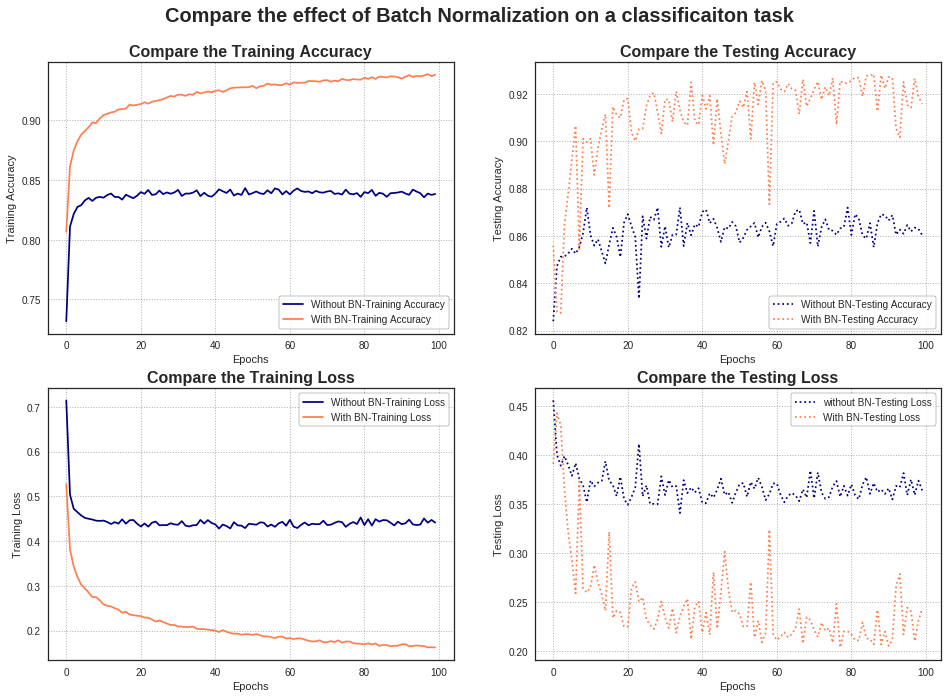

In [27]:
plt.style.use('seaborn-white')
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(16,11))
ax1.plot(model_1_history.history['acc'],color='navy',label='Without BN-Training Accuracy')
ax1.plot(model_2_history.history['acc'],color='coral',label='With BN-Training Accuracy')
ax1.legend(frameon=True,edgecolor='black')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training Accuracy')
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax1.set_title('Compare the Training Accuracy',fontsize=16, fontweight='bold')

ax2.plot(model_1_history.history['val_acc'],color='navy',linestyle=':',label='Without BN-Testing Accuracy')
ax2.plot(model_2_history.history['val_acc'],color='coral',linestyle=':',label='With BN-Testing Accuracy')
ax2.legend(frameon=True,edgecolor='black')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Testing Accuracy')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax2.set_title('Compare the Testing Accuracy',fontsize=16, fontweight='bold')

ax3.plot(model_1_history.history['loss'],color='navy',label='Without BN-Training Loss')
ax3.plot(model_2_history.history['loss'],color='coral',label='With BN-Training Loss')
ax3.legend(frameon=True,edgecolor='black')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Training Loss')
ax3.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax3.set_title('Compare the Training Loss',fontsize=16, fontweight='bold')

ax4.plot(model_1_history.history['val_loss'],color='navy',linestyle=':',label='without BN-Testing Loss')
ax4.plot(model_2_history.history['val_loss'],color='coral',linestyle=':',label='With BN-Testing Loss')
ax4.legend(frameon=True,edgecolor='black')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Testing Loss')
ax4.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax4.set_title('Compare the Testing Loss',fontsize=16, fontweight='bold')

fig.suptitle('Compare the effect of Batch Normalization on a classificaiton task',fontsize=20, fontweight='bold',y=0.95)
plt.show()